# Logistic Regression on Small Digits Dataset

### Loading the Data

The small digits dataset is available in sklearn.

In [ ]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

Lets check the format of the data

In [ ]:
# There are 1797 images (8 by 8 images, stored in vectors)
print("Image Data Shape" , digits.data.shape)
# 1797 labels (0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Show typical Images and Labels

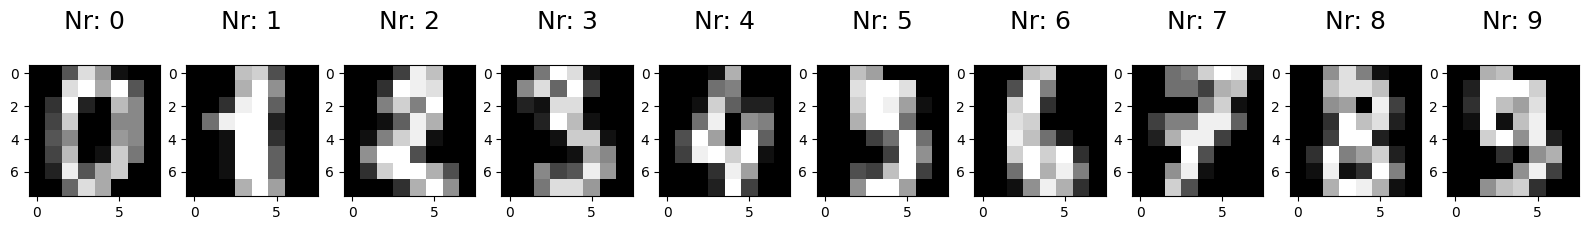

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Nr: %i\n' % label, fontsize = 18)

### Split Data into Training and Test **Sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the logistic regression method
Initiate an instance with some parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
# Experiment with other parameters until you get something that works fine
logitmodel = LogisticRegression(max_iter=10,tol=1,C=0.0001)

**Step 2.** Train the model on the data

In [ ]:
logitmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001, max_iter=10, tol=1)

In [ ]:
# Calculate accuracy
score = logitmodel.score(x_test, y_test)
print('{0:.4f}'.format(score))

0.9289


**Step 3.** Predict the labels of new images

In [ ]:
# Make Predictions on Test Data and compare with truth
predictions = logitmodel.predict(x_test)
print(predictions[120:150])
print(y_test[120:150])

[2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 3]
[2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 3]


### Confusion Matrix (Digits Dataset)

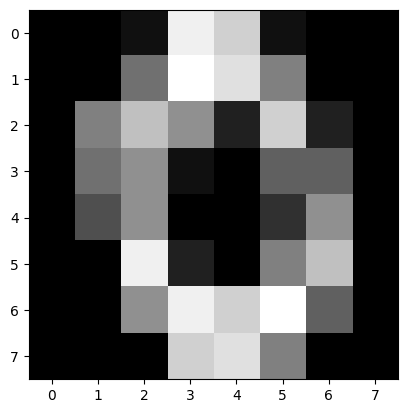

In [ ]:
plt.imshow(np.reshape(x_test[140,:], (8,8)), cmap=plt.cm.gray)

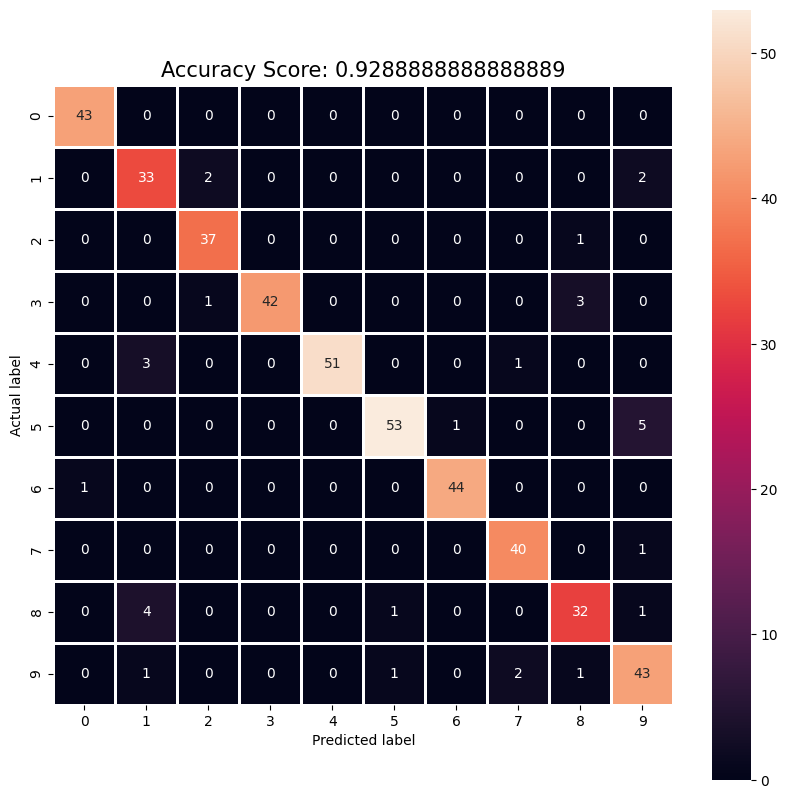

In [ ]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);
#plt.savefig('smalldigits.png')
#plt.show();

In [ ]:
# Find the image corresponding to a mis-classified digit:
# insert code here